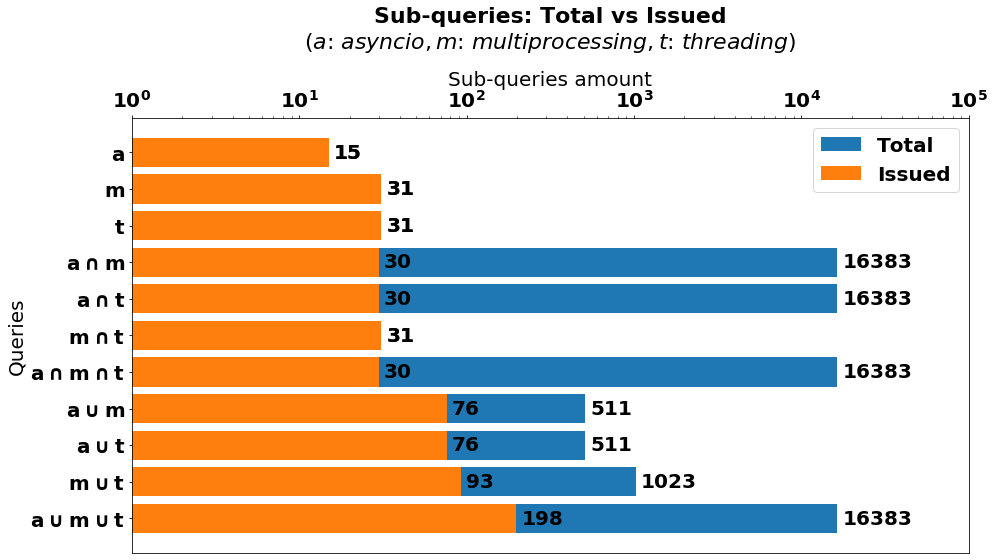

In [133]:
from matplotlib import pyplot as plt

def set_labels(rects, labels):
    for rect, label in zip(rects, labels):
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        #label = "{:.1f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha,                      # Horizontally align label differently for
                                        # positive and negative values.
            fontweight='bold')


names = ['$a$', '$m$', '$t$',
         '$a \\cap m$', '$a \\cap t$', '$m \\cap t$',
         '$a \\cap m \\cap t$',
         '$a \\cup m$', '$a \\cup t$', '$m \\cup t$',
         '$a \\cup m \\cup t$']
total, issued = zip(*[[15, 15], [31, 31], [31, 31], 
                      [16383, 30], [16383, 30], [31,31], 
                      [16383, 30], [511, 76], [511, 76], 
                      [1023, 93], [16383, 198]])
font = {'font.weight' : 'bold',
        'font.size'   : 20}
#print(plt.rcParams.keys())
plt.rcParams.update(font)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
height = 0.8
xaxis = range(0,11)
plt.barh(xaxis, total, label='Total', log=True)
plt.barh(xaxis, issued, label='Issued', log=True)
plt.title('Sub-queries: Total vs Issued\n$(a\\colon\\,\\,asyncio, ' 
          'm\\colon\\,\\,multiprocessing, t\\colon\\,\\,threading)$', 
          pad=22, weight='bold', size=22)
plt.legend()
plt.xlabel('Sub-queries amount')
plt.ylabel('Queries')

plt.yticks(xaxis, names)

rects = ax.patches

set_labels(rects, total + issued)
ax.set_xlim([1,10**5])

plt.savefig('example_results_plot.png')
plt.show()